In [21]:
import os
import scipy.io as sio
import scipy.misc as smisc
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy
import csv

from scipy import ndimage as ndi
import matplotlib.pyplot as plt
from skimage.feature import peak_local_max
from skimage import data, img_as_float

import scipy.io
import time
import glob,os
from scipy import optimize
from pylab import *


In [36]:
path = '/srv/home/chenyu/DEbackup/081919/081719_buckling.mat'
buckling = sio.loadmat(path)
buckling = buckling['QPlot']

In [37]:
print(buckling.shape)

(169, 4)


In [38]:
print(np.mean(np.abs(buckling[:,2]))*21.5)
print(np.std(np.abs(buckling[:,2]*21.5))/np.sqrt(buckling.shape[0]))

65.12584338550296
1.3277758951032306


In [32]:
row_buckling = np.zeros((20,4))
irow = 0
while buckling.shape[0] != 0:
    center = buckling[0,1]
    print(buckling.shape[0], center)
    index = find((buckling[:,1] < center + 7 ) & (buckling[:,1] > center - 7))
    row_buckling[irow,0] = np.mean(buckling[index,2])    # first column, mean buckling along x/[1100]
    row_buckling[irow,1] = np.std(buckling[index,2])/sqrt(len(index))    # second column, standard deviation of mean along x/[1100]
    row_buckling[irow,2] = np.mean(buckling[index,3])    # third column, mean buckling along y/[0001]
    row_buckling[irow,3] = np.std(buckling[index,3])/sqrt(len(index))    # fourth column, standard deviation of mean along y/[0001]
    buckling = np.delete(buckling, index, 0)
    irow = irow + 1
print(row_buckling.shape)
row_buckling = row_buckling[~np.all(row_buckling == 0, axis=1)]

169 8.4773555
156 26.188789
143 42.415493
130 61.398647
117 75.830315
104 91.610069
91 109.63528
78 125.71483
65 143.03995
52 158.94633
39 176.50568
26 192.79349
13 211.24086
(20, 4)


/srv/home/chenyu/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: The find function was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  


/srv/home/chenyu/anaconda/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


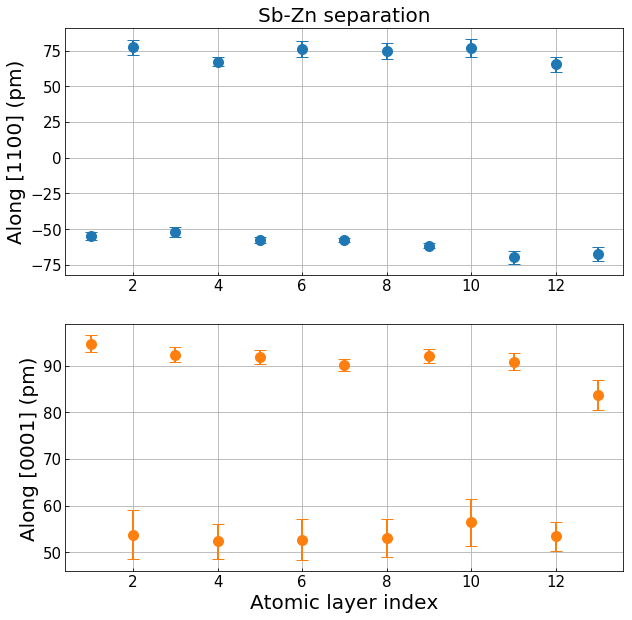

In [34]:
fig = plt.figure(figsize=(10,10))
plt.subplot(211)
plt.title('Sb-Zn separation', fontsize=20)
plt.errorbar(np.linspace(1,row_buckling.shape[0],row_buckling.shape[0]),row_buckling[::-1,0]*21.8,\
             yerr=row_buckling[::-1,1]*21.8,fmt='o',linewidth=2,ms=10, capsize=6, elinewidth=2)
# plt.xlabel('Atomic layer index',fontsize=20)
plt.ylabel('Along [1100] (pm)',fontsize=20)
plt.tick_params(labelsize=15,direction='in')
plt.grid('on')

plt.subplot(212)
plt.errorbar(np.linspace(1,row_buckling.shape[0],row_buckling.shape[0]),row_buckling[::-1,2]*21.8,\
             yerr=row_buckling[::-1,3]*21.8,fmt='o',linewidth=2, c='#ff7f0e',ms=10, capsize=6, elinewidth=2)
plt.xlabel('Atomic layer index',fontsize=20)
plt.ylabel('Along [0001] (pm)',fontsize=20)
plt.tick_params(labelsize=15,direction='in')
plt.grid('on')

In [14]:
row_buckling[:,0]*21.8

array([-67.37928069,  65.42475541, -69.71311323,  71.96048194,
       -61.49493582,  74.82638171, -57.61921275,  76.13379999,
       -57.66118446,  67.24673669, -51.9878116 ,  77.24841738,
       -54.77999249])